In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

path_name = '/home/anna/datasets/Bluecoat/'

# Numeric columns used for the scikit-learn matrix (file: sgos422_skfull_106.csv)
numeric_cols = ['weekday','hrs','time_taken','c_ip_1','c_ip_2','c_ip_3','c_ip_4','c_ip_5','c_ip_6','c_ip_7','c_ip_8','sc_filter_result_DENIED','sc_filter_result_OBSERVED','sc_status','s_action_TCP_AUTH_HIT','s_action_TCP_AUTH_MISS','s_action_TCP_CLIENT_REFRESH','s_action_TCP_DENIED','s_action_TCP_ERR_MISS','s_action_TCP_HIT','s_action_TCP_MISS','s_action_TCP_MISS_RST','s_action_TCP_NC_MISS','s_action_TCP_NC_MISS_RST','s_action_TCP_PARTIAL_MISS','s_action_TCP_REFRESH_MISS',
's_action_TCP_TUNNELED','cs_method_CONNECT','cs_method_DESCRIBE','cs_method_GET','cs_method_HEAD','cs_method_OPTIONS','cs_method_POST','cs_method_PROPFIND','cs_method_PUT','cs_method_get','cs_uri_scheme_http','cs_uri_scheme_tcp','cs_uri_port','domain_len','cs_uri_path_len','cs_uri_port_len','cs_uri_query_len','cs_uri_ext_len','url_len','sc_bytes','cs_bytes','Academic_Fraud','Adult_Themes','Adware','Alcohol','Anime_Manga_Webcomic','Auctions','Automotive','Blogs','Business_Services','Chat',
'Classifieds','Dating','Drugs','Ecommerce_Shopping','Educational_Institutions','File_Storage','Financial_Institutions','Forums_Message_boards','Gambling','Games','German_Youth_Protection','Government','Hate_Discrimination','Health_and_Fitness',   'Humor','Instant_Messaging','Jobs_Employment','Lingerie_Bikini','Movies','Music','News_Media','Non-Profits','Nudity','P2P_File_sharing','Parked_Domains','Photo_Sharing','Podcasts','Politics','Pornography','Portals','Proxy_Anonymizer',
'Radio','Religious','Research_Reference','Search_Engines','Sexuality','Social_Networking','Software_Technology','Sports','Tasteless','Television','Tobacco','Travel','Video_Sharing','Visual_Search_Engines','Weapons','Web_Spam','Webmail','sum_cat'
]
print len(numeric_cols)
# Numeric columns used for the scikit-learn matrix (file: sgos422_ipskl_74.csv)
ipgeo_cols = ['weekday','hrs','time_taken','c_ip_1','c_ip_2','c_ip_3','c_ip_4','c_ip_5','c_ip_6','c_ip_7','c_ip_8','sc_filter_result_DENIED','sc_filter_result_OBSERVED','sc_status','s_action_TCP_AUTH_HIT','s_action_TCP_AUTH_MISS','s_action_TCP_CLIENT_REFRESH','s_action_TCP_DENIED','s_action_TCP_ERR_MISS','s_action_TCP_HIT','s_action_TCP_MISS','s_action_TCP_MISS_RST','s_action_TCP_NC_MISS','s_action_TCP_NC_MISS_RST','s_action_TCP_PARTIAL_MISS','s_action_TCP_REFRESH_MISS',
's_action_TCP_TUNNELED','cs_method_CONNECT','cs_method_DESCRIBE','cs_method_GET','cs_method_HEAD','cs_method_OPTIONS','cs_method_POST','cs_method_PROPFIND','cs_method_PUT','cs_method_get','cs_uri_scheme_http','cs_uri_scheme_tcp','cs_uri_port','domain_len','cs_uri_path_len','cs_uri_port_len','cs_uri_query_len','cs_uri_ext_len','url_len','sc_bytes','cs_bytes','sum_cat','lat','lon','country_AR','country_BG','country_BR','country_CA','country_CN','country_CZ',
'country_DE','country_FR','country_GB','country_HK','country_IE','country_IL','country_IN','country_IT','country_JP','country_LV','country_NL','country_RU','country_SY','country_TW','country_UA','country_US','country_UY','country_VG']
print len(ipgeo_cols)

print "total # features: ", len(set(numeric_cols + ipgeo_cols))

106
74
total # features:  132


/home/anna/anaconda2/lib/python2.7/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [2]:
# These two lines are needed else it will not display all columns (26 total in my dataframe)
from IPython.display import display
pd.options.display.max_columns = None
# These two lines resize the plot area and font size
plt.rcParams['figure.figsize'] = (10,8)
plt.rcParams['font.size'] = 14

In [3]:
# Load into Pandas dataframes 
if len(numeric_cols) == 106:
    all_mat = pd.read_csv(path_name + 'sgos422_skfull_106.csv', names=numeric_cols, sep=',',header=0)
    print 'successfully loaded all_mat should be (1964813 x 106):', all_mat.shape
else:
    print 'did not load in all_mat: ', all_mat.shape
    
if len(ipgeo_cols) == 74:
    ip_mat = pd.read_csv(path_name + 'sgos422_ipskl_74.csv', names = ipgeo_cols, header=0, sep=',')
    print 'successfully loaded ip_mat should be (297793 x 74):', ip_mat.shape
else:
    print 'did not load in ip_mat: ', ip_mat.shape

successfully loaded all_mat should be (1964813 x 106): (1964138, 106)
successfully loaded ip_mat should be (297793 x 74): (297793, 74)


In [4]:
all_mat.head(3)

,weekday,hrs,time_taken,c_ip_1,c_ip_2,c_ip_3,c_ip_4,c_ip_5,c_ip_6,c_ip_7,c_ip_8,sc_filter_result_DENIED,sc_filter_result_OBSERVED,sc_status,s_action_TCP_AUTH_HIT,s_action_TCP_AUTH_MISS,s_action_TCP_CLIENT_REFRESH,s_action_TCP_DENIED,s_action_TCP_ERR_MISS,s_action_TCP_HIT,s_action_TCP_MISS,s_action_TCP_MISS_RST,s_action_TCP_NC_MISS,s_action_TCP_NC_MISS_RST,s_action_TCP_PARTIAL_MISS,s_action_TCP_REFRESH_MISS,s_action_TCP_TUNNELED,cs_method_CONNECT,cs_method_DESCRIBE,cs_method_GET,cs_method_HEAD,cs_method_OPTIONS,cs_method_POST,cs_method_PROPFIND,cs_method_PUT,cs_method_get,cs_uri_scheme_http,cs_uri_scheme_tcp,cs_uri_port,domain_len,cs_uri_path_len,cs_uri_port_len,cs_uri_query_len,cs_uri_ext_len,url_len,sc_bytes,cs_bytes,Academic_Fraud,Adult_Themes,Adware,Alcohol,Anime_Manga_Webcomic,Auctions,Automotive,Blogs,Business_Services,Chat,Classifieds,Dating,Drugs,Ecommerce_Shopping,Educational_Institutions,File_Storage,Financial_Institutions,Forums_Message_boards,Gambling,Games,German_Youth_Protection,Government,Hate_Discrimination,Health_and_Fitness,Humor,Instant_Messaging,Jobs_Employment,Lingerie_Bikini,Movies,Music,News_Media,Non-Profits,Nudity,P2P_File_sharing,Parked_Domains,Photo_Sharing,Podcasts,Politics,Pornography,Portals,Proxy_Anonymizer,Radio,Religious,Research_Reference,Search_Engines,Sexuality,Social_Networking,Software_Technology,Sports,Tasteless,Television,Tobacco,Travel,Video_Sharing,Visual_Search_Engines,Weapons,Web_Spam,Webmail,sum_cat
0,1,20,282,206,109,225,74,246,140,225,152,0,1,200,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,80,17,17,2,8,3,47,1395,663,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,20,216,97,84,217,25,248,213,102,144,0,1,200,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,80,15,16,2,14,1,48,473,1129,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,3
2,1,20,102,72,253,92,105,211,207,192,175,0,1,403,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,80,13,119,2,1,3,138,724,319,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [5]:
ip_mat.head(3)

,weekday,hrs,time_taken,c_ip_1,c_ip_2,c_ip_3,c_ip_4,c_ip_5,c_ip_6,c_ip_7,c_ip_8,sc_filter_result_DENIED,sc_filter_result_OBSERVED,sc_status,s_action_TCP_AUTH_HIT,s_action_TCP_AUTH_MISS,s_action_TCP_CLIENT_REFRESH,s_action_TCP_DENIED,s_action_TCP_ERR_MISS,s_action_TCP_HIT,s_action_TCP_MISS,s_action_TCP_MISS_RST,s_action_TCP_NC_MISS,s_action_TCP_NC_MISS_RST,s_action_TCP_PARTIAL_MISS,s_action_TCP_REFRESH_MISS,s_action_TCP_TUNNELED,cs_method_CONNECT,cs_method_DESCRIBE,cs_method_GET,cs_method_HEAD,cs_method_OPTIONS,cs_method_POST,cs_method_PROPFIND,cs_method_PUT,cs_method_get,cs_uri_scheme_http,cs_uri_scheme_tcp,cs_uri_port,domain_len,cs_uri_path_len,cs_uri_port_len,cs_uri_query_len,cs_uri_ext_len,url_len,sc_bytes,cs_bytes,sum_cat,lat,lon,country_AR,country_BG,country_BR,country_CA,country_CN,country_CZ,country_DE,country_FR,country_GB,country_HK,country_IE,country_IL,country_IN,country_IT,country_JP,country_LV,country_NL,country_RU,country_SY,country_TW,country_UA,country_US,country_UY,country_VG
0,1,20,102,72,253,92,105,211,207,192,175,0,1,403,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,80,13,119,2,1,3,138,724,319,0,52.3667,4.900,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,1,20,687,222,229,143,162,24,129,3,214,0,1,200,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,80,13,39,2,1,3,58,13120,311,0,42.5181,-83.263,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,1,20,147,72,253,92,105,211,207,192,175,0,1,403,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,80,13,117,2,1,3,136,724,317,0,52.3667,4.900,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [6]:
#pd.crosstab(bikes.season, bikes.index.month)
tm_cols = ['weekday','hrs','time_taken','sc_filter_result_DENIED','sc_filter_result_OBSERVED']
stat_cols = ['sc_status','s_action_TCP_AUTH_HIT','s_action_TCP_AUTH_MISS','s_action_TCP_CLIENT_REFRESH',
             's_action_TCP_DENIED','s_action_TCP_ERR_MISS','s_action_TCP_HIT','s_action_TCP_MISS',
             's_action_TCP_MISS_RST','s_action_TCP_NC_MISS','s_action_TCP_NC_MISS_RST','s_action_TCP_PARTIAL_MISS',
             's_action_TCP_REFRESH_MISS','s_action_TCP_TUNNELED', 'sc_filter_result_DENIED','sc_filter_result_OBSERVED']
meth_cols = ['cs_method_CONNECT','cs_method_DESCRIBE','cs_method_GET','cs_method_HEAD','cs_method_OPTIONS',
             'cs_method_POST','cs_method_PROPFIND','cs_method_PUT','cs_method_get', 
             'sc_filter_result_DENIED','sc_filter_result_OBSERVED']
uri_cols = ['cs_uri_port','cs_uri_scheme_http','cs_uri_scheme_tcp', 'sc_filter_result_DENIED','sc_filter_result_OBSERVED']
len_cols = ['domain_len','cs_uri_path_len','cs_uri_port_len','cs_uri_query_len','cs_uri_ext_len','url_len',
            'sc_filter_result_DENIED','sc_filter_result_OBSERVED']
bytes_cols = ['sc_bytes','cs_bytes','sc_filter_result_DENIED','sc_filter_result_OBSERVED']
cat_colsABC = ['Academic_Fraud','Adult_Themes','Adware','Alcohol','Anime_Manga_Webcomic','Auctions','Automotive',
               'Blogs','Business_Services','Chat','Classifieds', 'sc_filter_result_DENIED', 'sc_filter_result_OBSERVED']
cat_colsDEF = ['Dating','Drugs','Ecommerce_Shopping','Educational_Institutions','File_Storage','Financial_Institutions',
               'Forums_Message_boards','Gambling','Games','German_Youth_Protection','Government',
               'sc_filter_result_DENIED','sc_filter_result_OBSERVED']
cat_colsH2N = ['Hate_Discrimination','Health_and_Fitness','Humor','Instant_Messaging','Jobs_Employment',
               'Lingerie_Bikini','Movies','Music','News_Media','Non-Profits','Nudity',
               'sc_filter_result_DENIED','sc_filter_result_OBSERVED']
cat_colsP2R = ['P2P_File_sharing','Parked_Domains','Photo_Sharing','Podcasts','Politics','Pornography','Portals',
               'Proxy_Anonymizer','Radio','Religious','Research_Reference',
               'sc_filter_result_DENIED','sc_filter_result_OBSERVED']
cat_colsS2T = ['Search_Engines','Sexuality','Social_Networking','Software_Technology','Sports',
               'Tasteless','Television','Tobacco','Travel',
               'sc_filter_result_DENIED','sc_filter_result_OBSERVED']
cat_colsV2W = ['Video_Sharing','Visual_Search_Engines','Weapons','Web_Spam','Webmail','sum_cat',
               'sc_filter_result_DENIED','sc_filter_result_OBSERVED']
latlon_cols = ['lat','lon','sc_filter_result_DENIED','sc_filter_result_OBSERVED']
cntry_cols = ['country_AR','country_BG','country_BR','country_CA','country_CN','country_CZ',
              'country_DE','country_FR','country_GB','country_HK','country_IE','country_IL',
              'country_IN','country_IT','country_JP','country_LV','country_NL','country_RU',
              'country_SY','country_TW','country_UA','country_US','country_UY','country_VG',
              'sc_filter_result_DENIED','sc_filter_result_OBSERVED']


In [7]:
# Includes all of the features, except for IP addresses
len(set(tm_cols + stat_cols + meth_cols + uri_cols + len_cols + bytes_cols + cat_colsABC + cat_colsDEF + cat_colsH2N + cat_colsP2R + cat_colsS2T + cat_colsV2W + latlon_cols + cntry_cols))

124

In [8]:
all_mat[tm_cols].corr()

,weekday,hrs,time_taken,sc_filter_result_DENIED,sc_filter_result_OBSERVED
weekday,1.000000,0.875409,0.002889,-0.041192,0.041170
hrs,0.875409,1.000000,0.003021,-0.037227,0.033110
time_taken,0.002889,0.003021,1.000000,0.036198,-0.030507
sc_filter_result_DENIED,-0.041192,-0.037227,0.036198,1.000000,-0.855979
sc_filter_result_OBSERVED,0.041170,0.033110,-0.030507,-0.855979,1.000000


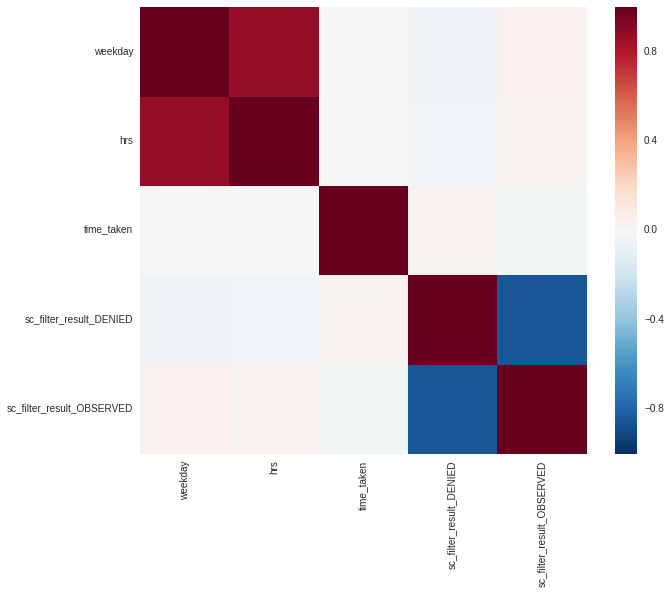

In [9]:
sns.heatmap(all_mat[tm_cols].corr())

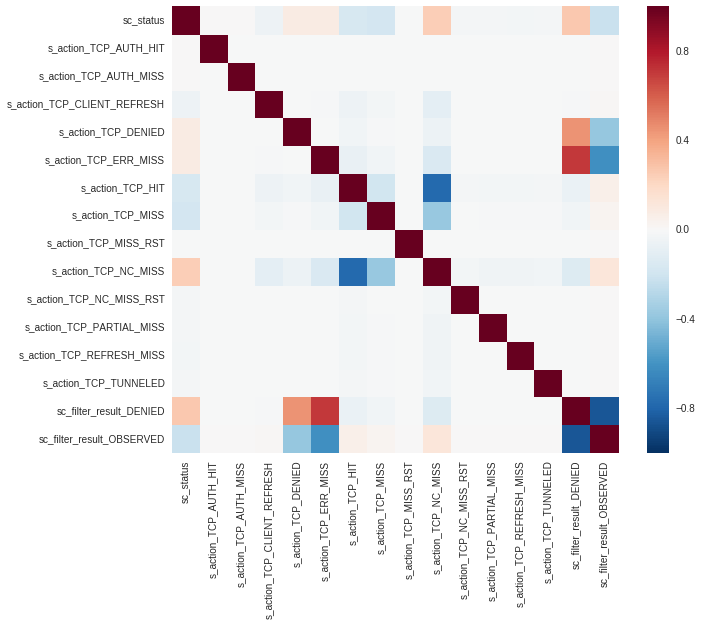

In [10]:
sns.heatmap(all_mat[stat_cols].corr())

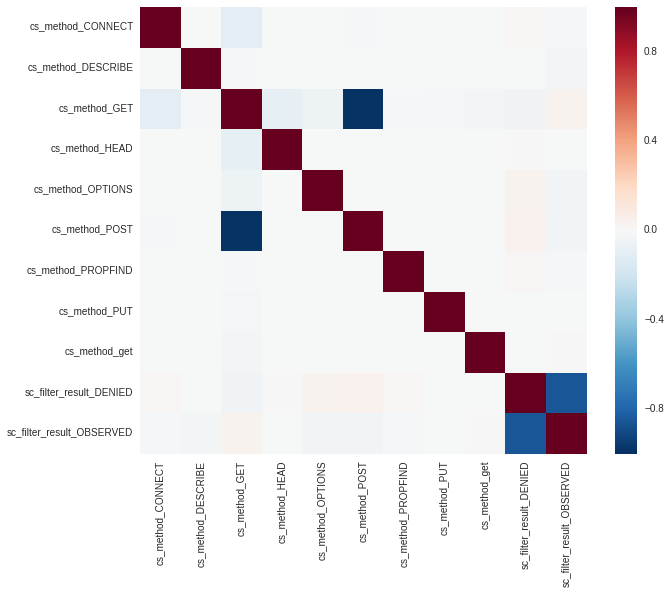

In [11]:
sns.heatmap(all_mat[meth_cols].corr())

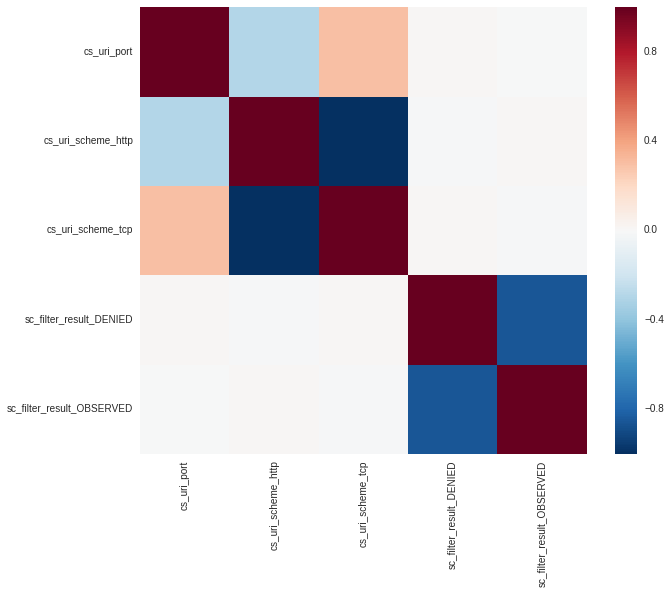

In [61]:
sns.heatmap(all_mat[uri_cols].corr())

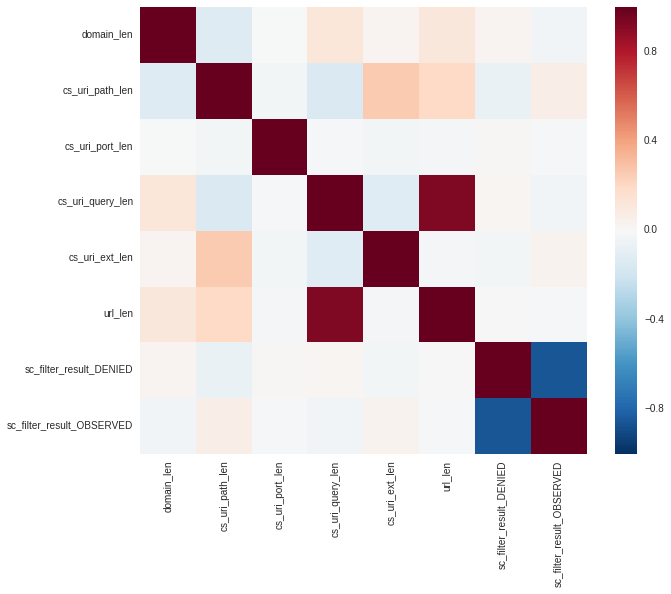

In [62]:
sns.heatmap(all_mat[len_cols].corr())

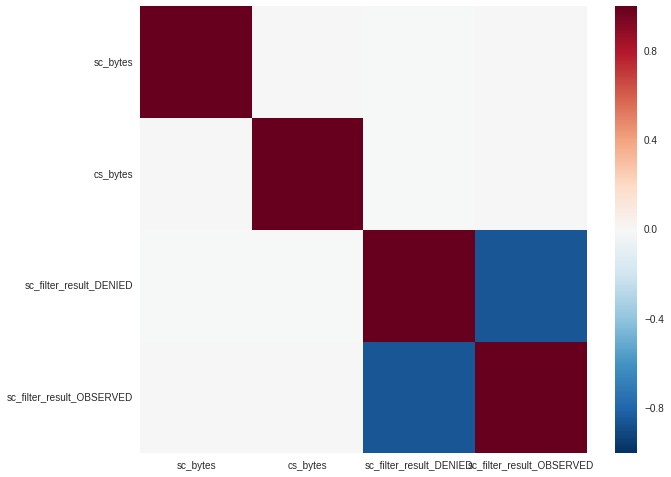

In [63]:
sns.heatmap(all_mat[bytes_cols].corr())

### Heatmap for Domain Categories
* Question: Should I remove IP addresses from this data set ?
* Question: Also what about removing any domain that did not have any classification (about 20% or so...)
* 297793 / 1964183 (15.1% of the dataset that has no web categories)
* I should probably split the categories by topical groupings, rather than alphabetical to see more common colors
* Run NB for non-web categories
* Run NB for ONLY web-categories
* Duplicate entries was only 1.5%?
* Very strong correlation between those 3 parameters
* What is a good visualization for NB classifier ?  

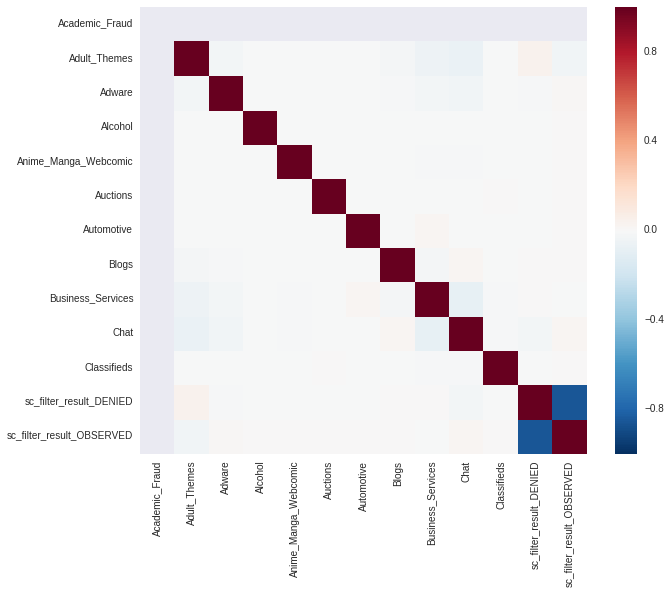

In [64]:
sns.heatmap(all_mat[cat_colsABC].corr())

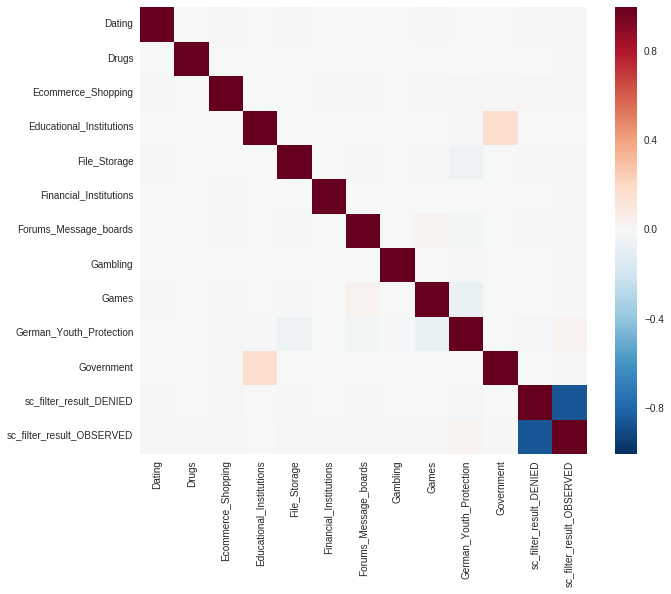

In [66]:
sns.heatmap(all_mat[cat_colsDEF].corr())

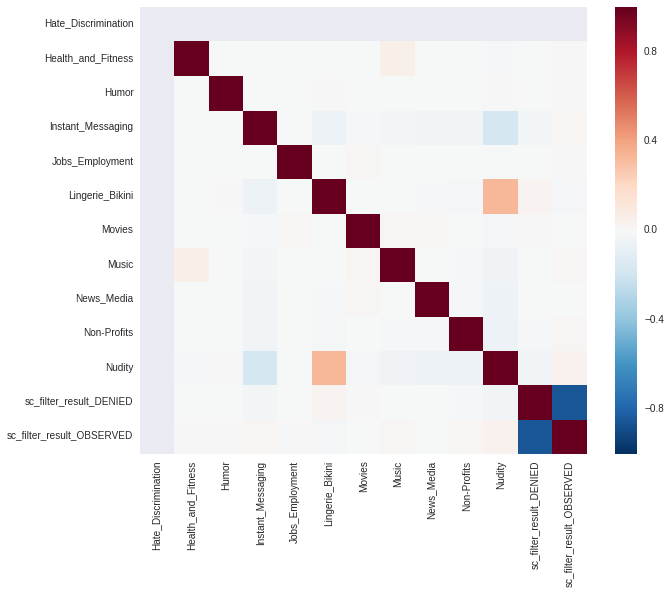

In [67]:
sns.heatmap(all_mat[cat_colsH2N].corr())

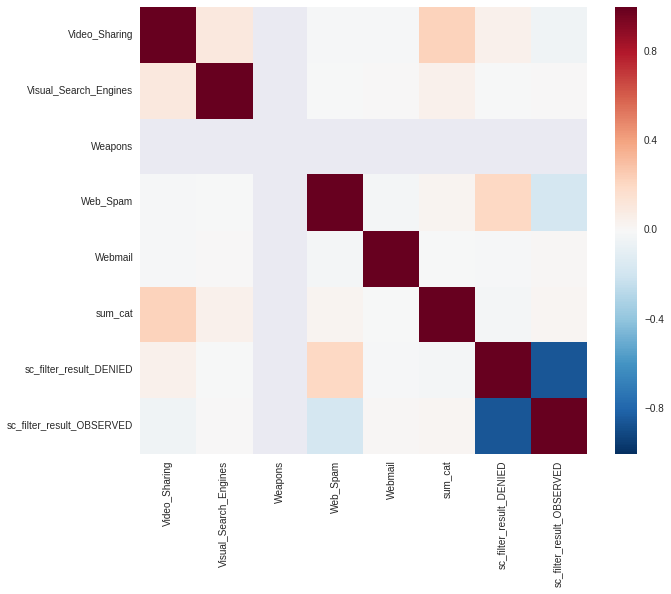

In [65]:
sns.heatmap(all_mat[cat_colsV2W].corr())

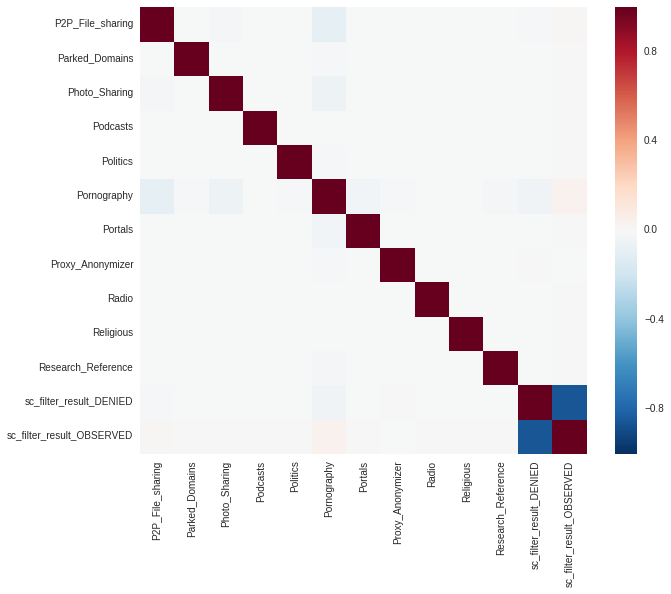

In [68]:
sns.heatmap(all_mat[cat_colsP2R].corr())

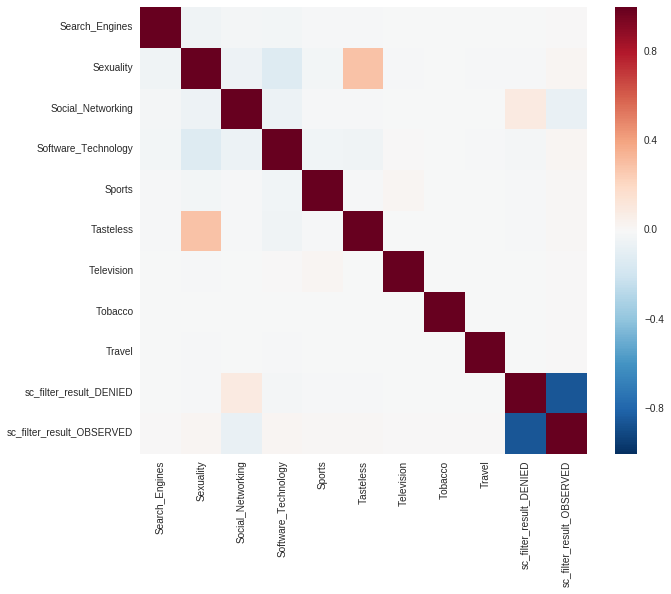

In [69]:
sns.heatmap(all_mat[cat_colsS2T].corr())

### cs_host IP specific head-maps

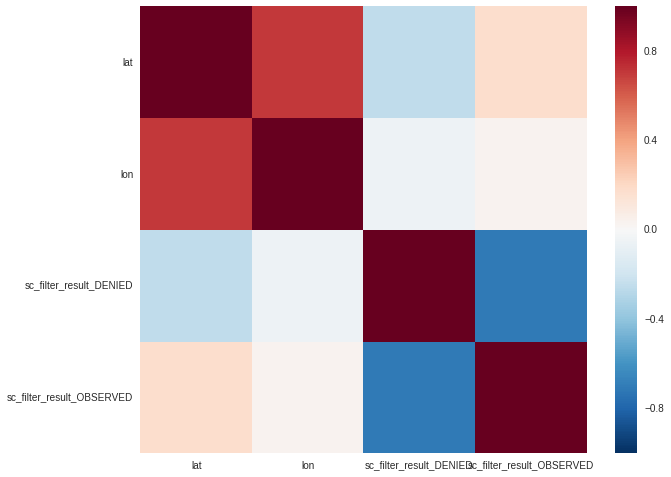

In [70]:
sns.heatmap(ip_mat[latlon_cols].corr())

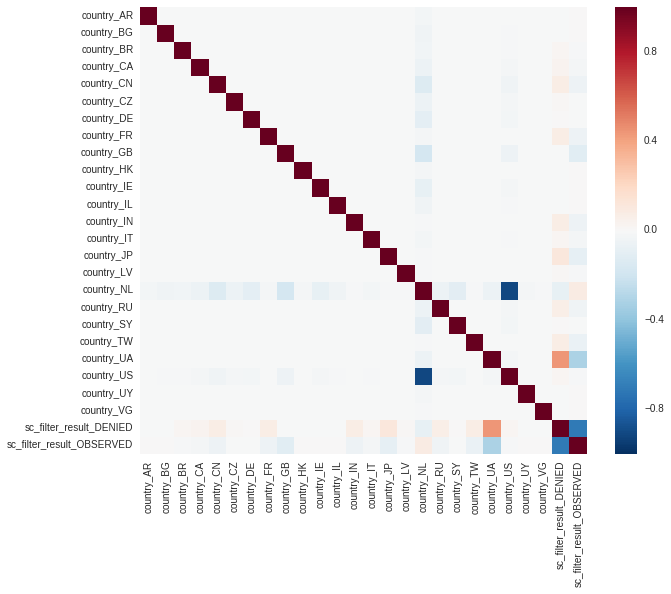

In [71]:
sns.heatmap(ip_mat[cntry_cols].corr())

In [66]:
isr = ip_mat[ip_mat.country_IL == 1]

In [75]:
isr_cols = ['country_IL','sc_filter_result_DENIED', 'sc_filter_result_OBSERVED']
isr[isr_cols]
#sns.heatmap(isr[isr_cols].corr()) -- lots of NaNs, maybe I can't do this with unordered categorical values

,country_IL,sc_filter_result_DENIED,sc_filter_result_OBSERVED
255,1,0,1
451,1,0,1
640,1,0,1
1492,1,0,1
4018,1,0,1
4284,1,0,1
4470,1,0,1
4490,1,0,1
4669,1,0,1
5545,1,0,1


### Correlated Fields (all_mat):
Higher:
* s_action_TCP_DENIED
* s_action_TCP_ERR_MISS
* sc_status

Lower:
* s_action_TCP_NC_MISS
* domain_len
* cs_uri_path_len

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f5275e68c50>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7f5246b708d0>]], dtype=object)

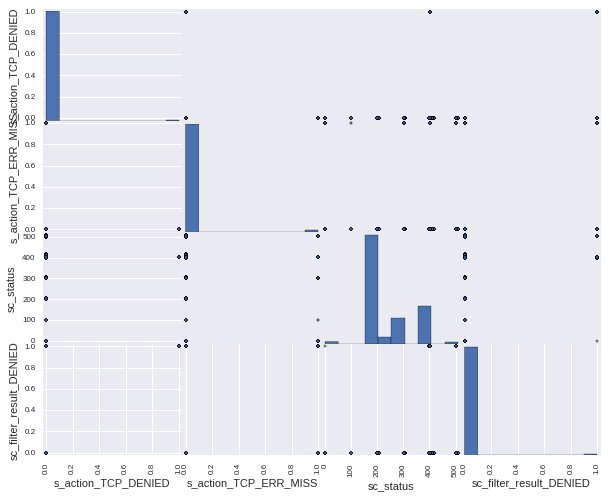

In [74]:
scatter_cols = ['s_action_TCP_DENIED', 's_action_TCP_ERR_MISS', 'sc_status','sc_filter_result_DENIED']
pd.scatter_matrix(all_mat[scatter_cols])

### Logistic Regression

In [4]:
from sklearn.cross_validation import train_test_split

In [5]:
feature_cols = ['s_action_TCP_DENIED', 's_action_TCP_ERR_MISS', 'sc_status','sc_filter_result_DENIED']
X = all_mat[feature_cols]
y = all_mat.sc_filter_result_DENIED
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [6]:
print 'Original shape:', X.shape, y.shape
print 'Training shape:', X_train.shape, y_train.shape
print 'Testing shape:', X_test.shape, y_test.shape

Original shape: (1964138, 4) (1964138,)
Training shape: (1473103, 4) (1473103,)
Testing shape: (491035, 4) (491035,)


In [7]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(C=1e9)
logreg.fit(X_train, y_train)
ypred_deny_train = logreg.predict(X_train)

In [8]:
from sklearn import metrics
print metrics.accuracy_score(y_train, ypred_deny_train)

0.999999321161


In [9]:
metrics.roc_auc_score(y_train, ypred_deny_train)

0.99997156990959235

In [91]:
ypred_deny_test = logreg.predict(X_test)

In [92]:
print metrics.accuracy_score(y_test, ypred_deny_test)

1.0


#### Appropriate models for mostly categorical (unordered) dataset: Logistic Regression, but not linear regression or KNN.  What other model might be appropriate?

### Naive-Bayes
* Read into Pandas: Full enriched dataset (sgos422_enrich_127.csv and sgos422_ipgeo_155.csv) that has not been transformed (incl. mostly text)
* Split train/test
* CountVectorize, fit model w/ train data --> generate the document term matrix (DTM)
* predict denial rating

No stemming, lemmatization, or stopwords

In [98]:
# 1.0 result above - how can that be?
print ypred_deny_test.shape
print y_test.shape

(491035,)
(491035,)


In [72]:
full_mat = pd.read_csv(path_name+'sgos422_enrich_127.csv', header=0, sep=',')

### TF-IDF

In [99]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from textblob import TextBlob, Word